In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

DATA_PATH = '../cell-profiler/output-by-mask'
FILENAME = '0.2_B_Nuclei.csv'

Load data

In [2]:
def load_data(data_path=DATA_PATH, filename = FILENAME):
    csv_path = os.path.join(data_path, filename)
    return pd.read_csv(csv_path)

In [3]:
nuclei = load_data()

Extract image name from metadata

In [4]:
nuclei.head()

,ImageNumber,ObjectNumber,Metadata_FileLocation,Metadata_Frame,Metadata_Series,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Center_Z,AreaShape_Compactness,...,Texture_SumEntropy_OrigBlue_3_02,Texture_SumEntropy_OrigBlue_3_03,Texture_SumVariance_OrigBlue_3_00,Texture_SumVariance_OrigBlue_3_01,Texture_SumVariance_OrigBlue_3_02,Texture_SumVariance_OrigBlue_3_03,Texture_Variance_OrigBlue_3_00,Texture_Variance_OrigBlue_3_01,Texture_Variance_OrigBlue_3_02,Texture_Variance_OrigBlue_3_03
0,1,1,file:/Users/vladarozova/Dropbox/New%20experime...,0,0,5577,694.0,124.0,1.0,1.135369,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,file:/Users/vladarozova/Dropbox/New%20experime...,0,0,3662,57.0,168.0,1.0,1.112215,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,file:/Users/vladarozova/Dropbox/New%20experime...,0,0,3770,496.0,193.0,1.0,1.277002,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,file:/Users/vladarozova/Dropbox/New%20experime...,0,0,5974,450.0,312.0,1.0,1.065656,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,file:/Users/vladarozova/Dropbox/New%20experime...,0,0,2548,412.0,437.0,1.0,1.139721,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
nuclei.drop(['Metadata_Frame', 'Metadata_Series'], axis=1, inplace=True)

In [7]:
# Stiffness
nuclei['stiffness'] = nuclei.Metadata_FileLocation.str.split('%20').str[2]

In [8]:
# Combination
nuclei['combination'] = nuclei.Metadata_FileLocation.str.split('%20').str[4].str.extract('([A-Z]/)', expand=False).str.strip('/')

In [9]:
# Well
nuclei['well'] = nuclei.Metadata_FileLocation.str.extract('([A-Z][1-9])', expand=False)

In [10]:
# Site
nuclei['site'] = nuclei.Metadata_FileLocation.str.extract('(-[1-9]-)', expand=False).str.strip('-')
nuclei.site =  pd.to_numeric(nuclei.site)

In [11]:
nuclei.drop('Metadata_FileLocation', axis=1, inplace=True)

In [12]:
nuclei.head()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Center_Z,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,...,Texture_SumVariance_OrigBlue_3_02,Texture_SumVariance_OrigBlue_3_03,Texture_Variance_OrigBlue_3_00,Texture_Variance_OrigBlue_3_01,Texture_Variance_OrigBlue_3_02,Texture_Variance_OrigBlue_3_03,stiffness,combination,well,site
0,1,1,5577,694.0,124.0,1.0,1.135369,0.791620,1.0,0.755282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,B,A1,1
1,1,2,3662,57.0,168.0,1.0,1.112215,0.773956,1.0,0.742799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,B,A1,1
2,1,3,3770,496.0,193.0,1.0,1.277002,0.866965,1.0,0.754302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,B,A1,1
3,1,4,5974,450.0,312.0,1.0,1.065656,0.684016,1.0,0.693844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,B,A1,1
4,1,5,2548,412.0,437.0,1.0,1.139721,0.781407,1.0,0.667715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,B,A1,1


Examine the data

In [13]:
nuclei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 109 entries, ImageNumber to site
dtypes: float64(98), int64(8), object(3)
memory usage: 85.2+ KB


In [14]:
nuclei.dtypes

ImageNumber                                        int64
ObjectNumber                                       int64
AreaShape_Area                                     int64
AreaShape_Center_X                               float64
AreaShape_Center_Y                               float64
AreaShape_Center_Z                               float64
AreaShape_Compactness                            float64
AreaShape_Eccentricity                           float64
AreaShape_EulerNumber                            float64
AreaShape_Extent                                 float64
AreaShape_FormFactor                             float64
AreaShape_MajorAxisLength                        float64
AreaShape_MaxFeretDiameter                       float64
AreaShape_MaximumRadius                          float64
AreaShape_MeanRadius                             float64
AreaShape_MedianRadius                           float64
AreaShape_MinFeretDiameter                       float64
AreaShape_MinorAxisLength      

In [18]:
# Are there any missing values?
(nuclei.isnull().sum().sum())

0


In [16]:
nuclei.describe()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Center_Z,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,...,Texture_SumEntropy_OrigBlue_3_03,Texture_SumVariance_OrigBlue_3_00,Texture_SumVariance_OrigBlue_3_01,Texture_SumVariance_OrigBlue_3_02,Texture_SumVariance_OrigBlue_3_03,Texture_Variance_OrigBlue_3_00,Texture_Variance_OrigBlue_3_01,Texture_Variance_OrigBlue_3_02,Texture_Variance_OrigBlue_3_03,site
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.0,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000
mean,6.000000,5.990000,3860.000000,503.000000,472.010000,1.0,1.133075,0.718287,1.0,0.708435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.720000
std,3.078108,3.661139,997.426669,250.240934,220.031976,0.0,0.100195,0.132376,0.0,0.057922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.189856
min,1.000000,1.000000,2157.000000,57.000000,84.000000,1.0,1.002299,0.309539,1.0,0.573744,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,3.000000,3068.500000,309.000000,305.500000,1.0,1.059363,0.640220,1.0,0.671539,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,6.000000,5.500000,3767.000000,523.500000,457.500000,1.0,1.112270,0.744111,1.0,0.708266,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
75%,9.000000,8.000000,4392.000000,716.250000,608.500000,1.0,1.179126,0.815142,1.0,0.754783,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
max,10.000000,15.000000,6406.000000,946.000000,966.000000,1.0,1.627146,0.931700,1.0,0.847647,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000


In [19]:
nuclei.describe(include=['object'])

,stiffness,combination,well
count,100,100,100
unique,1,1,3
top,0.2,B,A3
freq,100,100,43


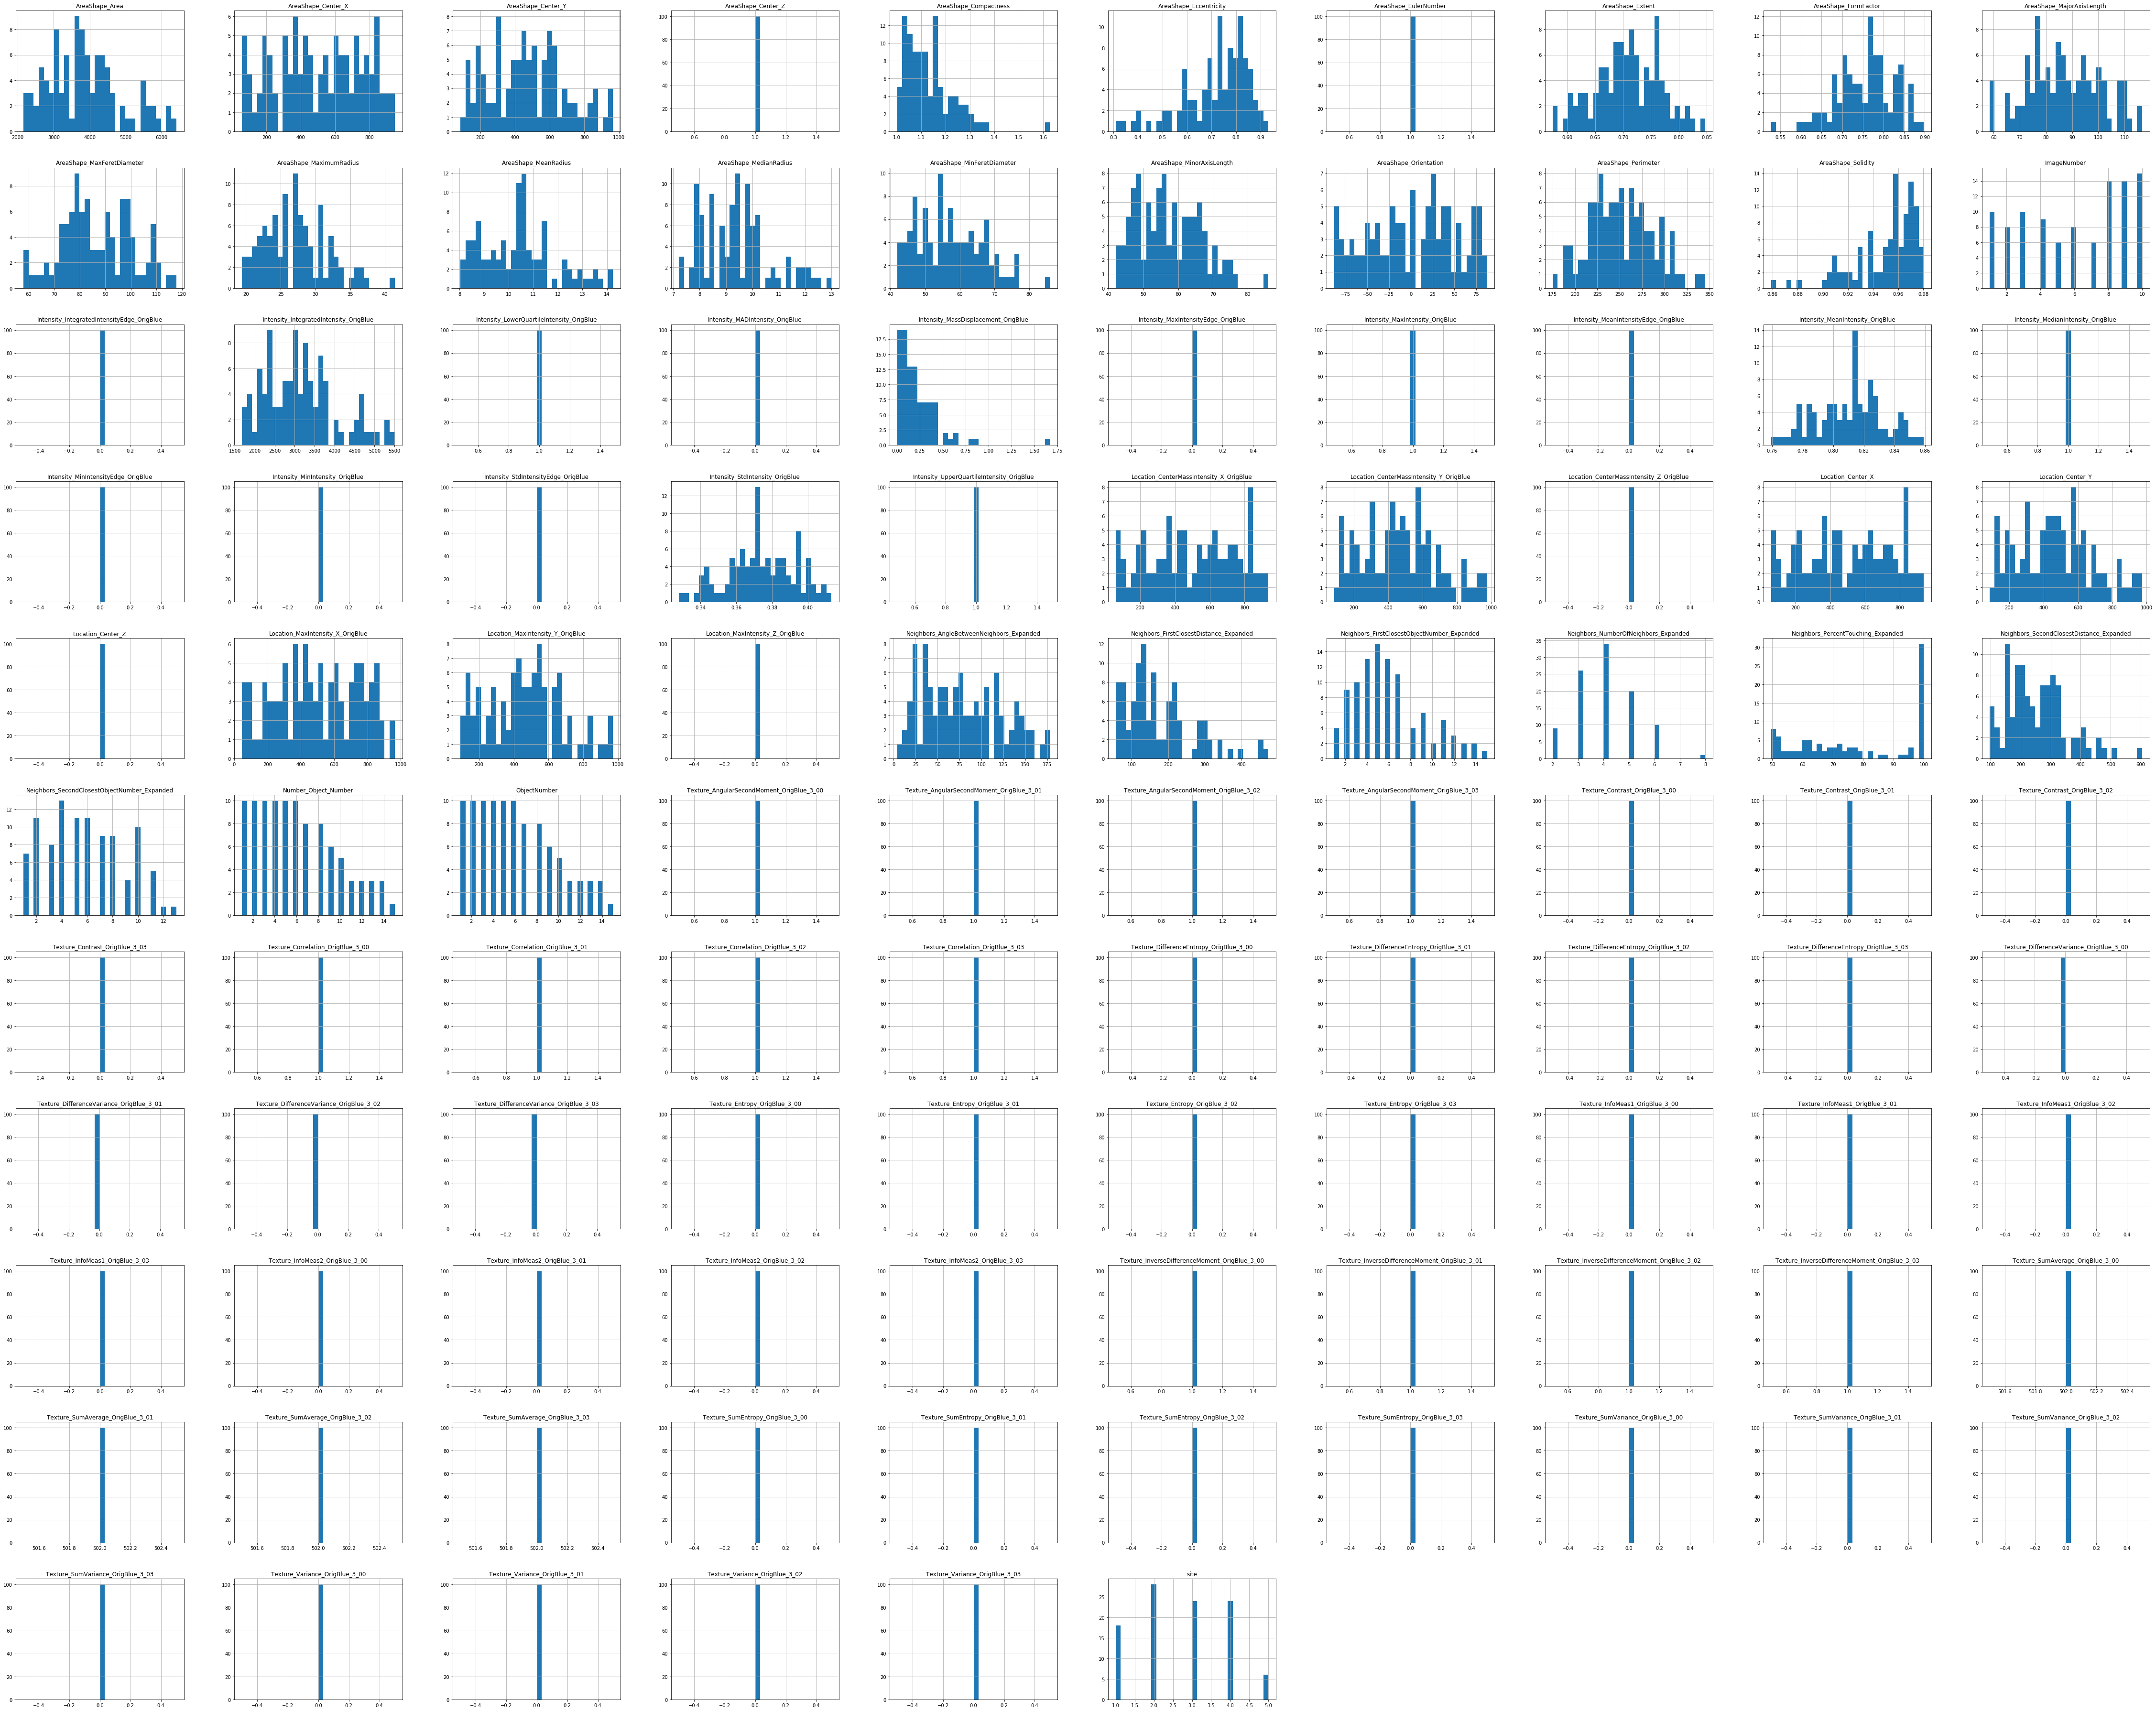

In [23]:
nuclei.hist(bins = 30, figsize = (80, 65))
plt.show()

In [26]:
import numpy as np

x = np.array([1, 1, 2, 1, 2])
y = np.array([5, 7, 8, 5, 7])

In [27]:
z = np.array([1, 1, 2, 1, 2, 5, 7, 8, 5, 7])

In [30]:
np.mean(x), np.std(x)

(1.3999999999999999, 0.4898979485566356)

In [31]:
np.mean(y), np.std(y)

(6.4000000000000004, 1.2)

In [32]:
np.mean(z), np.std(z)

(3.8999999999999999, 2.6627053911388696)

((array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
  array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
  <a list of 10 Patch objects>),
 (array([ 2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.]),
  array([ 5. ,  5.3,  5.6,  5.9,  6.2,  6.5,  6.8,  7.1,  7.4,  7.7,  8. ]),
  <a list of 10 Patch objects>))

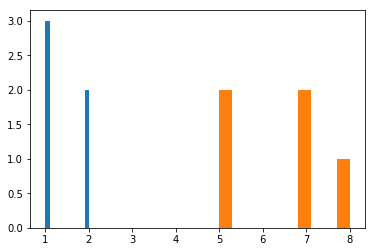

In [40]:
plt.hist(x), plt.hist(y)

(array([ 3.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  1.]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

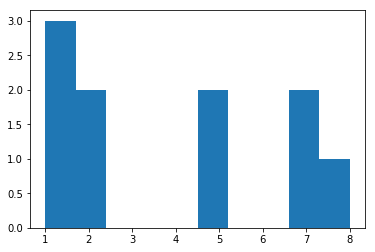

In [41]:
plt.hist(z)

((array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
  array([ -8.16496581e-01,  -6.12372436e-01,  -4.08248290e-01,
          -2.04124145e-01,   1.11022302e-16,   2.04124145e-01,
           4.08248290e-01,   6.12372436e-01,   8.16496581e-01,
           1.02062073e+00,   1.22474487e+00]),
  <a list of 10 Patch objects>),
 (array([ 2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.]),
  array([-1.16666667, -0.91666667, -0.66666667, -0.41666667, -0.16666667,
          0.08333333,  0.33333333,  0.58333333,  0.83333333,  1.08333333,
          1.33333333]),
  <a list of 10 Patch objects>))

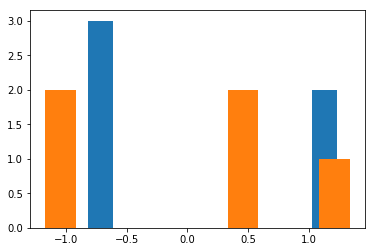

In [42]:
plt.hist((x - np.mean(x))/np.std(x)), plt.hist((y - np.mean(y))/np.std(y))

(array([ 3.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  1.]),
 array([-1.08911786, -0.82622734, -0.56333682, -0.30044631, -0.03755579,
         0.22533473,  0.48822525,  0.75111577,  1.01400628,  1.2768968 ,
         1.53978732]),
 <a list of 10 Patch objects>)

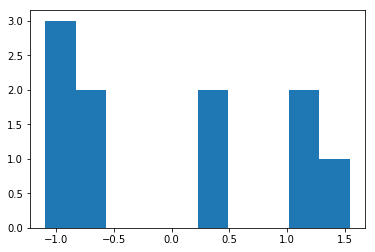

In [43]:
plt.hist((z - np.mean(z))/np.std(z))